In [1]:
%autosave 90

Autosaving every 90 seconds


Name: Jishnu Chander Ravichanderan <br>
Github Username: jishnuchander <br>
USC ID: 1144843551 <br>

In [123]:
# Importing all required libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor as fl
import seaborn as sns
from scipy.stats import variation
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, mean_squared_error 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import xgboost as xg
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## 1. Decision Trees as Interpretable Models

In [3]:
path = os.getcwd()+"\Homework_5_Data\diagnosis.csv"
df = pd.read_csv(path, header=None)

In [6]:
column_names = ['temperature', 'nausea', 'lumbar', 'pushing', 'pains', 'burning', 'inflammation', 'nephritis']
df.columns = column_names
df.sample(10)

,temperature,nausea,lumbar,pushing,pains,burning,inflammation,nephritis
110,"41,2",yes,yes,yes,yes,yes,yes,yes
82,"40,3",no,yes,yes,no,yes,no,yes
85,"40,4",yes,yes,yes,yes,no,yes,yes
52,"37,8",no,yes,no,no,no,no,no
54,"37,8",no,no,yes,no,no,yes,no
24,"37,0",no,no,yes,yes,yes,yes,no
11,"36,6",no,yes,no,no,no,no,no
112,"41,2",yes,yes,no,yes,no,no,yes
15,"36,7",no,yes,no,no,no,no,no
73,"40,0",no,no,no,no,no,no,no


In [7]:
df['temperature'] = df['temperature'].str.replace(',', '.').astype(float)
df.nausea = df.nausea.map(dict(yes=1, no=0))
df.lumbar = df.lumbar.map(dict(yes=1, no=0))
df.pushing = df.pushing.map(dict(yes=1, no=0))
df.pains = df.pains.map(dict(yes=1, no=0))
df.burning = df.burning.map(dict(yes=1, no=0))
df.inflammation = df.inflammation.map(dict(yes=1, no=0))
df.nephritis = df.nephritis.map(dict(yes=1, no=0))

In [8]:
df

,temperature,nausea,lumbar,pushing,pains,burning,inflammation,nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


(b) Build a decision tree on the whole data set and plot it.

In [9]:
X = df[['temperature', 'nausea', 'lumbar', 'pushing', 'pains', 'burning']]
y = df[['inflammation', 'nephritis']]

In [10]:
def transform(a, b):
    if a==0 and b==0:
        return 0
    elif a==1 and b==0:
        return 1
    elif a==0 and b==1:
        return 2
    elif a==1 and b==1:
        return 3

In [11]:
y['label_powerset'] = y.apply(lambda row: transform(row['inflammation'], row['nephritis']), axis=1)

In [12]:
Y = y['label_powerset']

In [13]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X, Y)

DecisionTreeClassifier()

In [15]:
Y_pred = clf.predict(X)
print(accuracy_score(Y_pred, Y))

1.0


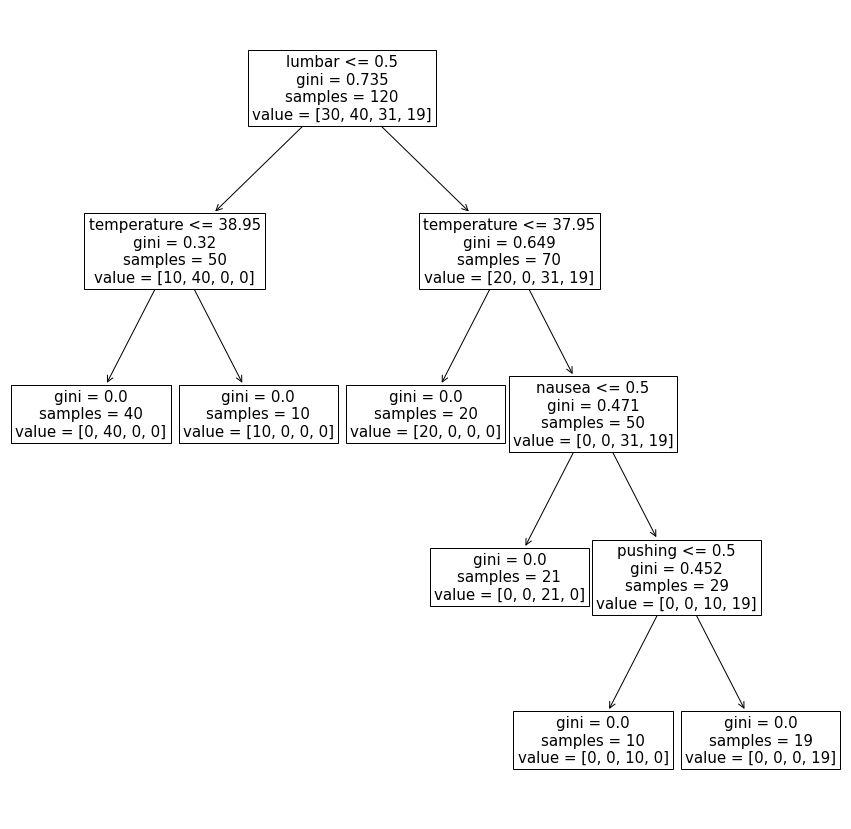

In [16]:
plt.figure(figsize=(15,15))
plot_tree(clf, feature_names=X.columns, fontsize=15)
plt.show()

(c) Convert the decision rules into a set of IF-THEN rules.

In [47]:
def tree_to_pseudo(tree, feature_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent+"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent+"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent+"}")
        else:
            my_list = value[node][0]
            max_value = max(my_list)
            max_index = np.where(my_list==max_value)
            print(indent+"return " + str(value[node]))
            print(indent+"Class label is: "+str(max_index[0][0]))

    recurse(left, right, threshold, features, 0)

In [48]:
tree_to_pseudo(clf, X.columns)

if ( lumbar <= 0.5 ) {
  if ( temperature <= 38.95000076293945 ) {
    return [[ 0. 40.  0.  0.]]
    Class label is: 1
  } else {
    return [[10.  0.  0.  0.]]
    Class label is: 0
  }
} else {
  if ( temperature <= 37.95000076293945 ) {
    return [[20.  0.  0.  0.]]
    Class label is: 0
  } else {
    if ( nausea <= 0.5 ) {
      return [[ 0.  0. 21.  0.]]
      Class label is: 2
    } else {
      if ( pushing <= 0.5 ) {
        return [[ 0.  0. 10.  0.]]
        Class label is: 2
      } else {
        return [[ 0.  0.  0. 19.]]
        Class label is: 3
      }
    }
  }
}


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.

In [35]:
ccp_path = clf.cost_complexity_pruning_path(X, Y)

In [36]:
alphas = ccp_path['ccp_alphas']
print(alphas)

[0.         0.09816667 0.13333333 0.182      0.22291667]


In [37]:
accuracy_train = []
for i in alphas:
    clf_ccp = DecisionTreeClassifier(ccp_alpha=i)
    clf_ccp.fit(X, Y)
    Y_pred = clf_ccp.predict(X)
    print(i, accuracy_score(Y_pred, Y))

0.0 1.0
0.09816666666666667 0.8416666666666667
0.13333333333333333 0.7583333333333333
0.18199999999999997 0.5916666666666667
0.22291666666666676 0.3333333333333333


In [38]:
final_dt = DecisionTreeClassifier(ccp_alpha=alphas[1])
final_dt.fit(X, Y)
Y_pred = final_dt.predict(X)
print(i, accuracy_score(Y_pred, Y))

0.22291666666666676 0.8416666666666667


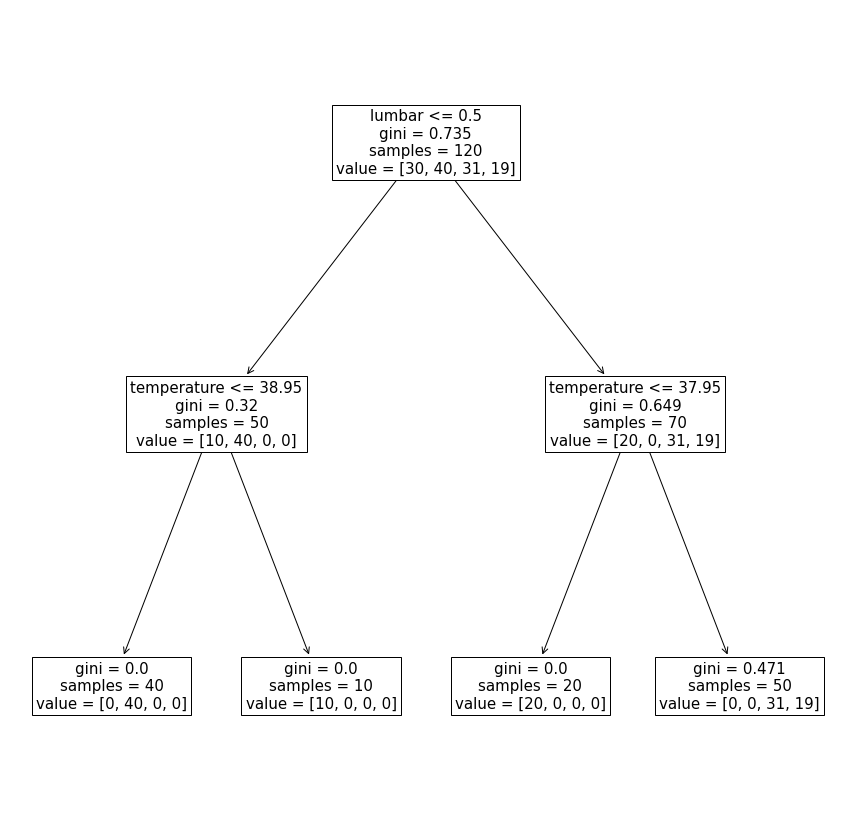

In [39]:
# Plotting the minimal decision tree
plt.figure(figsize=(15,15))
plot_tree(final_dt, feature_names=X.columns, fontsize=15)
plt.show()

In [49]:
tree_to_pseudo(final_dt, X.columns)

if ( lumbar <= 0.5 ) {
  if ( temperature <= 38.95000076293945 ) {
    return [[ 0. 40.  0.  0.]]
    Class label is: 1
  } else {
    return [[10.  0.  0.  0.]]
    Class label is: 0
  }
} else {
  if ( temperature <= 37.95000076293945 ) {
    return [[20.  0.  0.  0.]]
    Class label is: 0
  } else {
    return [[ 0.  0. 31. 19.]]
    Class label is: 2
  }
}


## The LASSO and Boosting for Regression

In [50]:
path = os.getcwd()+"\Homework_5_Data\communities.csv"
df_crime = pd.read_csv(path, header=None)

In [51]:
df_crime.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
284,34,23,10750,Carteretborough,2,0.01,0.56,0.11,0.76,0.25,...,0.01,0.36,0.22,?,?,?,?,0.00,?,0.19
1391,18,?,?,Jaspercity,7,0.00,0.39,0.00,1.00,0.00,...,0.02,0.10,0.03,?,?,?,?,0.00,?,0.10
362,1,?,?,Birminghamcity,2,0.41,0.37,1.00,0.02,0.03,...,0.43,0.15,0.20,0.36,0.13,0.74,0.5,0.38,0.2,1.00
1692,5,?,?,Magnoliacity,9,0.00,0.41,0.66,0.47,0.02,...,0.02,0.11,0.01,?,?,?,?,0.00,?,0.20
1372,6,?,?,SantaPaulacity,7,0.02,0.76,0.01,0.38,0.06,...,0.01,0.46,0.04,?,?,?,?,0.00,?,0.36
1038,6,?,?,Arcatacity,6,0.01,0.36,0.02,0.88,0.16,...,0.02,0.16,0.07,?,?,?,?,0.00,?,0.16
89,6,?,?,Yucaipacity,1,0.04,0.34,0.01,0.89,0.06,...,0.08,0.10,0.01,?,?,?,?,0.00,?,0.15
409,6,?,?,MenloParkcity,3,0.03,0.29,0.24,0.68,0.36,...,0.03,0.23,0.20,?,?,?,?,0.00,?,0.25
1443,6,?,?,Placentiacity,8,0.05,0.67,0.04,0.64,0.50,...,0.02,0.52,0.08,?,?,?,?,0.00,?,0.14
1442,53,?,?,Redmondcity,8,0.04,0.37,0.03,0.87,0.39,...,0.04,0.21,0.27,?,?,?,?,0.00,?,0.06


(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [52]:
df_crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)

In [53]:
df_crime.sample(10)

,5,6,7,8,9,10,11,12,13,14,...,118,119,120,121,122,123,124,125,126,127
1805,0.03,0.31,0.02,0.96,0.03,0.05,0.42,0.43,0.29,0.54,...,0.07,0.09,0.06,?,?,?,?,0.00,?,0.45
1428,0.01,0.37,0.68,0.44,0.03,0.03,0.40,0.44,0.26,0.49,...,0.04,0.09,0.00,?,?,?,?,0.00,?,0.51
1596,0.02,0.66,0.10,0.86,0.08,0.11,0.33,0.46,0.16,0.05,...,0.05,0.10,0.07,?,?,?,?,0.00,?,0.14
1702,0.12,0.46,0.10,0.75,0.42,0.19,0.33,0.50,0.24,0.06,...,0.10,0.20,0.08,0.01,0.02,0.57,0.5,0.27,0.08,0.09
1366,0.00,0.21,0.30,0.74,0.11,0.02,0.22,0.49,0.24,0.55,...,0.00,0.38,0.13,?,?,?,?,0.00,?,0.31
1882,0.01,0.51,0.01,0.98,0.06,0.01,0.37,0.46,0.31,0.33,...,0.06,0.06,0.26,?,?,?,?,0.00,?,0.08
1981,0.07,0.38,0.17,0.84,0.11,0.04,0.35,0.41,0.30,0.64,...,0.09,0.13,0.17,0.02,0.01,0.72,0,0.62,0.15,0.07
1901,0.01,0.47,0.03,0.88,0.01,0.03,0.46,0.45,0.24,0.34,...,0.05,0.07,0.01,?,?,?,?,0.00,?,0.16
154,0.00,0.39,0.75,0.39,0.05,0.02,0.38,0.41,0.26,0.69,...,0.03,0.08,0.01,?,?,?,?,0.00,?,0.87
85,0.00,0.36,0.04,0.93,0.10,0.01,0.34,0.38,0.23,0.69,...,0.02,0.14,0.01,?,?,?,?,0.00,?,0.06


In [54]:
df_crime = df_crime.replace('?', np.nan)

In [55]:
X = df_crime.loc[:, :126]
Y = df_crime[127]

In [56]:
X_train = X[:1495]
X_test = X[1495:]
Y_train = Y[:1495]
Y_test = Y[1495:]

In [58]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [59]:
imp.fit(X_train)
X_train_imp = imp.transform(X_train)

In [60]:
X_test_imp = imp.transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp)

In [61]:
X_train_imp = pd.DataFrame(X_train_imp)

(c) Plot a correlation matrix for the features in the data set.

In [100]:
corrMatrix = X_train_imp.corr()

In [101]:
corrMatrix.style.background_gradient(cmap='coolwarm')

(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in
which s is sample standard deviation and m is sample mean.

In [65]:
coeff_varitaion_result = []
for col in X_train_imp:
    var = variation(X_train_imp[col], axis = 0)
    coeff_varitaion_result.append((col, var))

In [75]:
for i, j in coeff_varitaion_result:
    print("The coefficient of variation in feature "+str(i)+" is: "+str(j))

The coefficient of variation in feature 0 is: 2.240354965879167
The coefficient of variation in feature 1 is: 0.3556805499866515
The coefficient of variation in feature 2 is: 1.4284074506092599
The coefficient of variation in feature 3 is: 0.3301022059521686
The coefficient of variation in feature 4 is: 1.3586450597327888
The coefficient of variation in feature 5 is: 1.6115517541662485
The coefficient of variation in feature 6 is: 0.36895965939030007
The coefficient of variation in feature 7 is: 0.2912173646346084
The coefficient of variation in feature 8 is: 0.500142555817522
The coefficient of variation in feature 9 is: 0.4126379005920212
The coefficient of variation in feature 10 is: 2.037779618174568
The coefficient of variation in feature 11 is: 0.6431029790755587
The coefficient of variation in feature 12 is: 0.5917801462174822
The coefficient of variation in feature 13 is: 0.328504134149932
The coefficient of variation in feature 14 is: 0.7016630853607426
The coefficient of vari

(e) Pick root of 128 features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [76]:
coeff_best = sorted(coeff_varitaion_result, key = lambda x: x[1], reverse=True)[:11]

In [77]:
cols = [x[0] for x in coeff_best]

In [78]:
cols

[90, 89, 49, 51, 120, 27, 0, 10, 71, 113, 5]

In [79]:
X_train_selected = X_train_imp[cols]

In [80]:
X_test_selected = X_test_imp[cols]

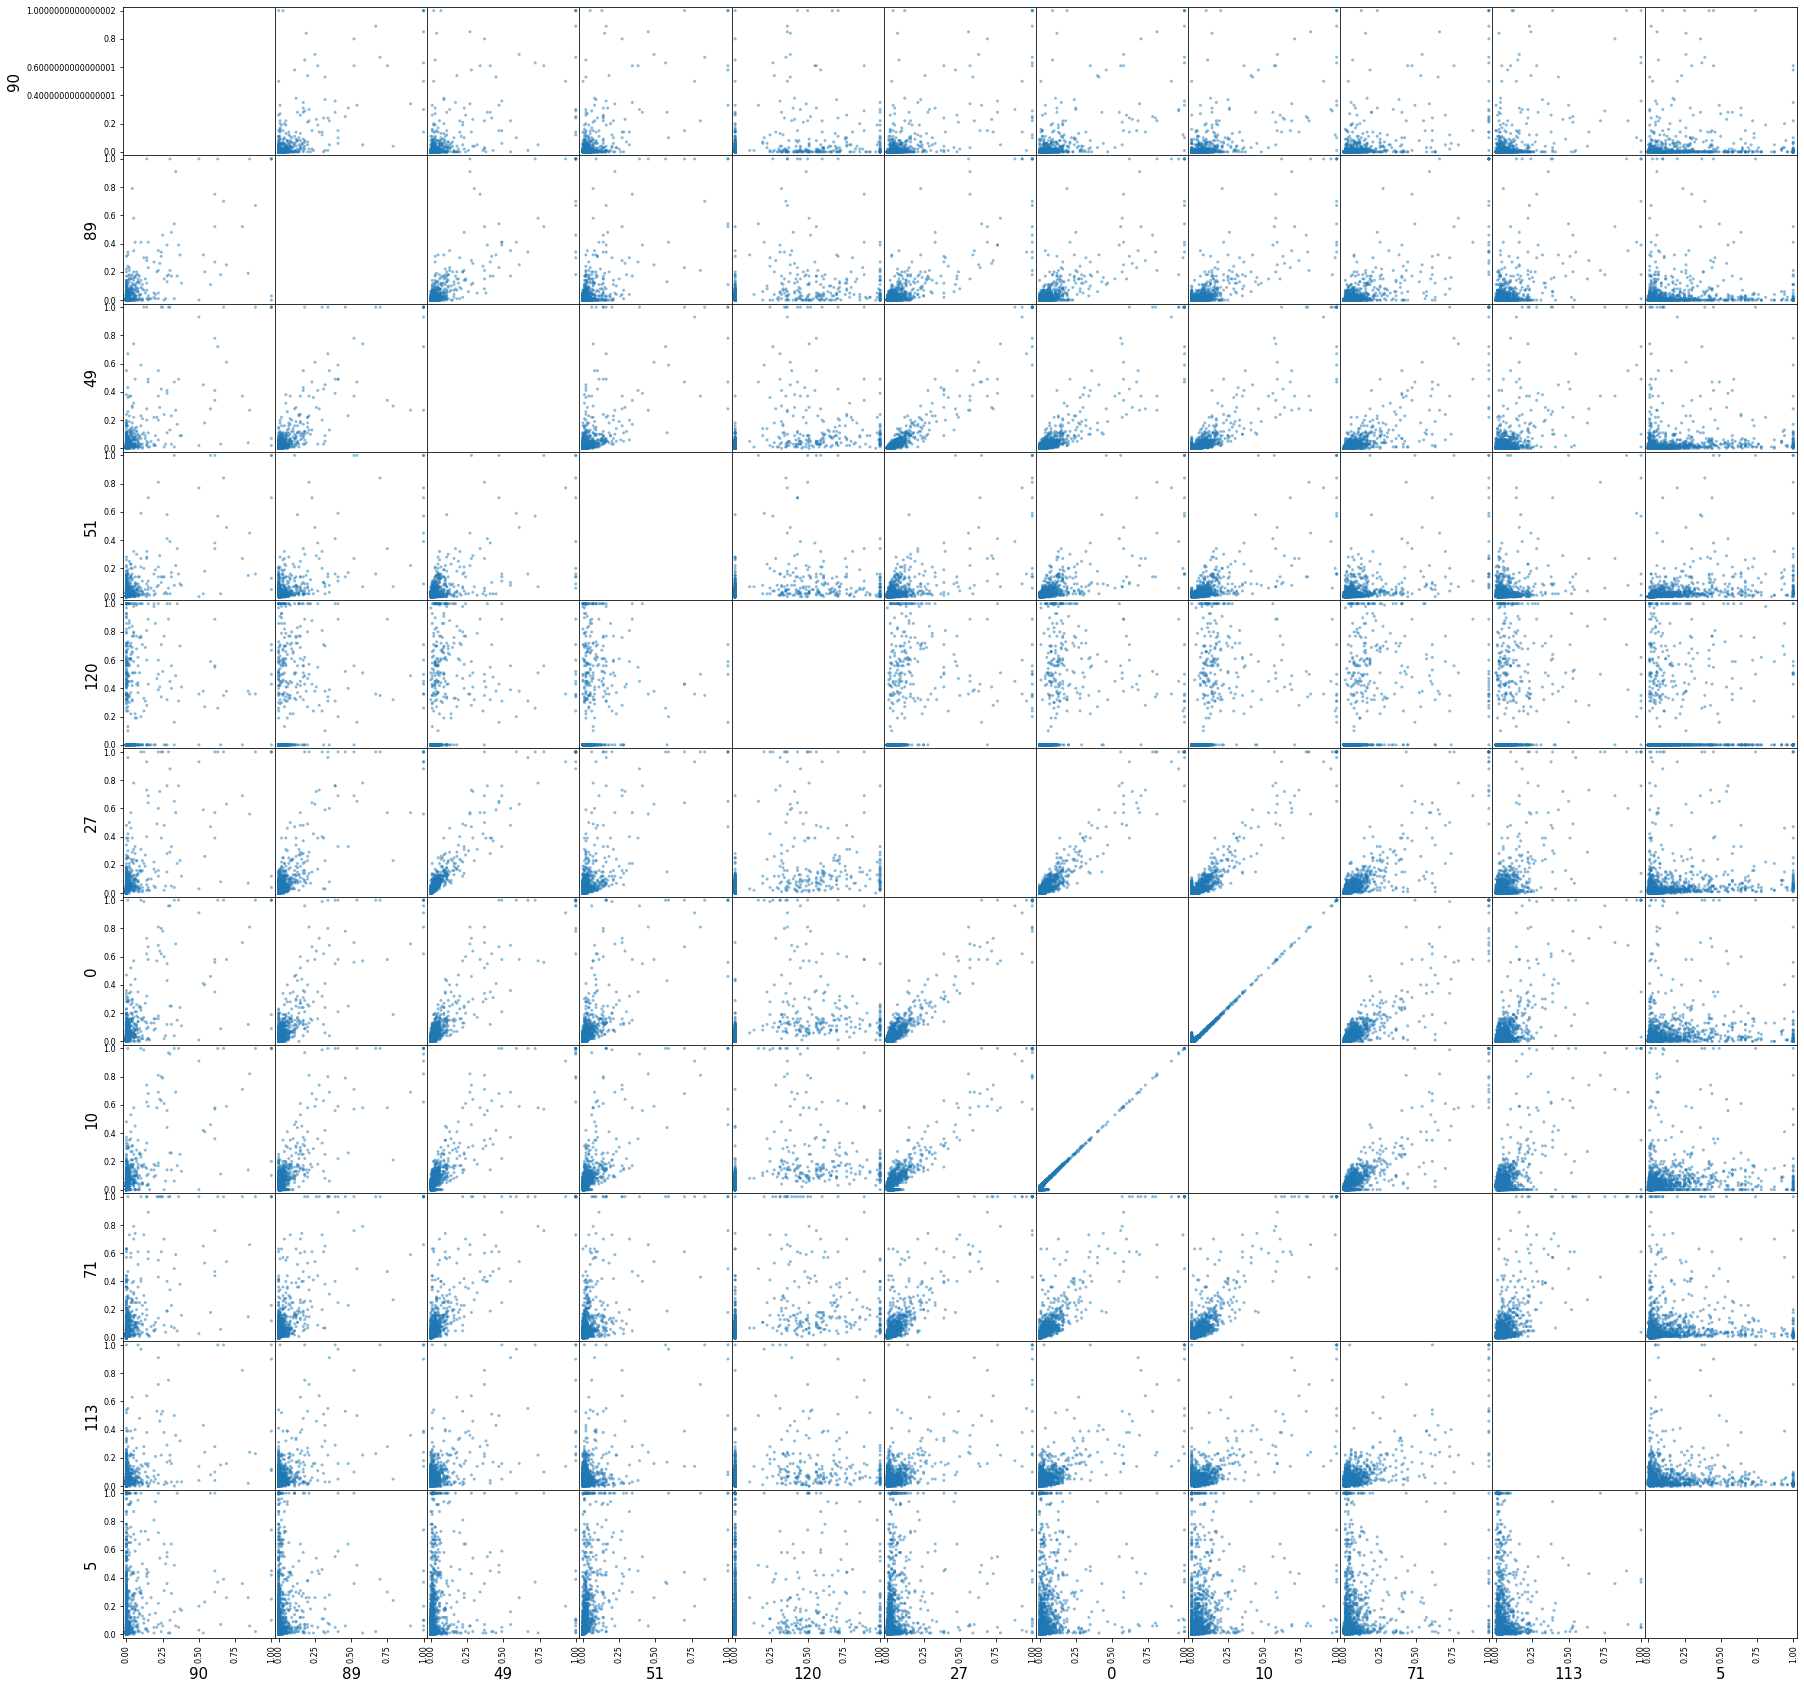

In [82]:
scatter_matrix = pd.plotting.scatter_matrix(X_train_selected, figsize=(30, 30), diagonal=None)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 15, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 15, rotation = 90)
plt.show()

<AxesSubplot:>

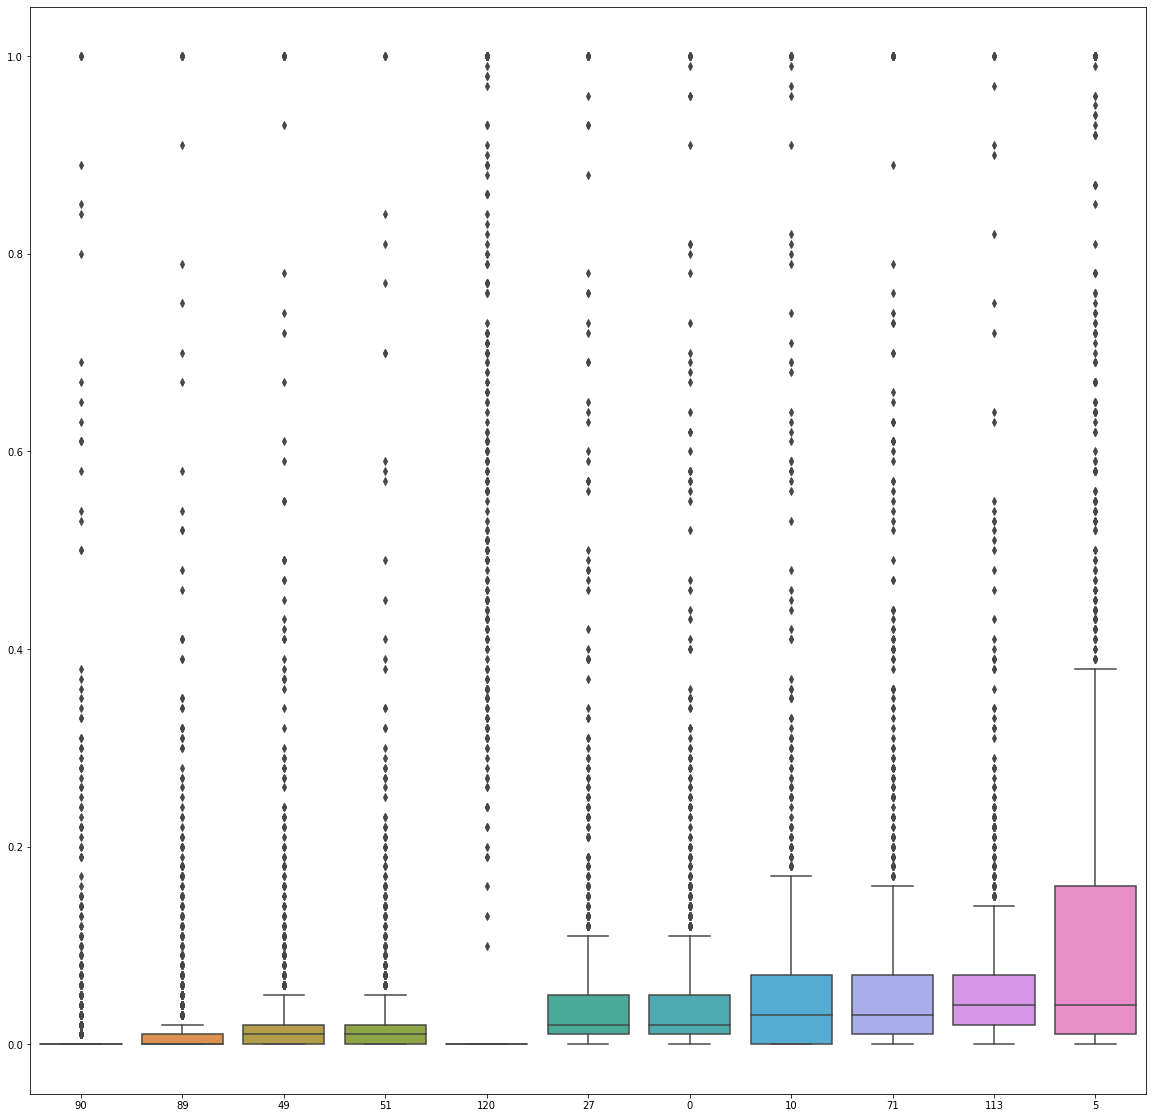

In [83]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(data = X_train_selected, ax=ax)

Feature 0 and feature 10 have almost exactly linear relationship from their scatter plot, thus one of them would be sufficient as a feature. Feature 120 is evenly distributed in the scatter plots with the other features and shows most indpendence from other features, so I believe it will be a significant feature in prediction.

(f) Fit a linear model using least squares to the training set and report the test error.

In [85]:
reg = LinearRegression()
reg.fit(X_train_selected, Y_train)
Y_train_pred = reg.predict(X_train_selected)
print(mean_squared_error(Y_train_pred, Y_train))

0.0365611631745262


In [88]:
pred = reg.predict(X_test_selected)
print("MSE on test set for linear regression: ", mean_squared_error(Y_test, pred))

MSE on test set for linear regression:  0.02925751264989082


(g) Fit a ridge regression model on the training set, with lambda chosen by cross-validation.
Report the test error obtained.

In [90]:
r_alphas = np.logspace(-5, 5, 100)
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
ridge_model = ridge_model.fit(X_train_selected, Y_train)
pred = ridge_model.predict(X_test_selected)
print("MSE on test set for ridge regression: ", mean_squared_error(Y_test, pred))

MSE on test set for ridge regression:  0.029164951333146623


In [91]:
ridge_model.alpha_

0.44306214575838776

(h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4 features. Report the test error for both cases and
compare them.

In [96]:
reg_lasso = LassoCV(alphas=r_alphas).fit(X_train_selected, Y_train)
pred = reg_lasso.predict(X_test_selected)
print("MSE on test set for LASSO regression: ", mean_squared_error(Y_test, pred))

MSE on test set for LASSO regression:  0.02904582708005335


In [104]:
reg_lasso.alpha_

0.00016297508346206434

In [102]:
reg_lasso.n_features_in_

11

In [105]:
reg_lasso.coef_

array([ 0.25817151,  0.00189299,  0.97035467, -0.16838006,  0.16774478,
        0.31309356, -0.9270067 , -0.14315392,  0.50998275, -0.16552178,
        0.23449609])

The number of features seen by the model is 11 and have been selected by the model.

In [125]:
scaler = StandardScaler()
scaler.fit(X_train_selected)
X_train_selected_std = scaler.transform(X_train_selected)

In [127]:
reg_lasso_std = LassoCV(alphas=r_alphas).fit(X_train_selected_std, Y_train)
pred = reg_lasso_std.predict(scaler.transform(X_test_selected))
print("MSE on test set for LASSO regression after standardization: ", mean_squared_error(Y_test, pred))

MSE on test set for LASSO regression after standardization:  0.0290847351028498


In [129]:
reg_lasso_std.n_features_in_

11

In [130]:
reg_lasso_std.coef_

array([ 0.02635848,  0.00075216,  0.11129728, -0.01713415,  0.03920931,
        0.03942164, -0.1175007 , -0.01779683,  0.07494039, -0.01810012,
        0.05468608])

We can see that the LASSO model once again sees all the features during the fit. We get a slightly higher test MSE after standardizing the features.

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [107]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train_selected))

In [110]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((len(X_reduced),1)), Y_train, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

In [111]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], Y_train, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

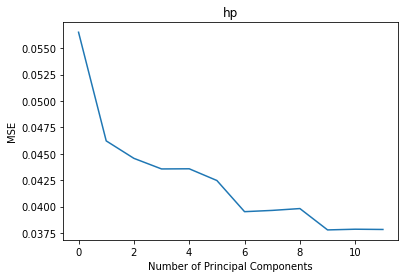

In [112]:
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')
plt.show()

We choose M = 9

In [113]:
X_reduced_test = pca.transform(scale(X_test_selected))[:,:9]
regr = LinearRegression()
regr.fit(X_reduced[:, :9], Y_train)

LinearRegression()

In [114]:
pred = regr.predict(X_reduced_test)
print("MSE: ", mean_squared_error(Y_test, pred))

MSE:  0.02934093582779673


(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine
alpha (the regularization term) using cross-validation.

In [116]:
params = {"reg_alpha": r_alphas}

In [118]:
GSCV = GridSearchCV(estimator= xg.XGBRegressor(objective='reg:squarederror', seed = 123), param_grid = params)

In [119]:
GSCV.fit(X_train_selected, Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_esti...
       4.75081016e+02, 5.99484250e+02, 7.56463328e+02, 9.54548457e+02,
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.

In [120]:
GSCV.best_params_

{'reg_alpha': 1.7886495290574351}

In [121]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', reg_alpha = GSCV.best_params_["reg_alpha"])
xgb_r =xgb_r.fit(X_train_selected, Y_train)

In [122]:

# print(mean_squared_error(Y_train_pred, Y_train))
pred = xgb_r.predict(X_test_selected)
print("MSE on test set for xgboost: ", mean_squared_error(Y_test, pred))

MSE:  0.01989670686608353
